In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
f = lambda x: np.sin(2*x) # function to integrate
a = 0 # lower limit
b = np.pi # upper limit
n = 100
h = (b - a) / n # step size

i_sum = (1 / 2) * (f(a) + f(b))
for i in range(1, n):
    i_sum += f(a + i * h)
Integral = h * i_sum
print(f"Numerical Integration = {Integral:.6f}")

Numerical Integration = 0.000000


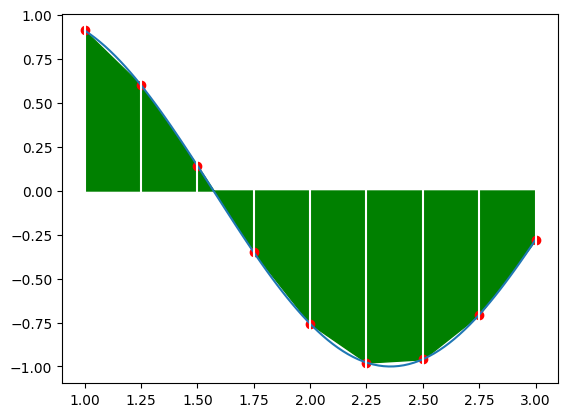

In [5]:
# Output
plt.plot(xi, fi, 'ro')
plt.plot(xk, fk)

# Trapecios
plt.fill_between(xi, 0, fi, color='g')
for i in range(0, samples, 1):
    plt.axvline(xi[i], color='w')
plt.show()